In [2]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from fetch_request import download

In [3]:
from sklearn.preprocessing import StandardScaler

def create_data_points(centroids, n, std=0.5):
    X, y = make_blobs(n_samples=n, centers=centroids, cluster_std=std)

    X = StandardScaler().fit_transform(X)
    return X, y

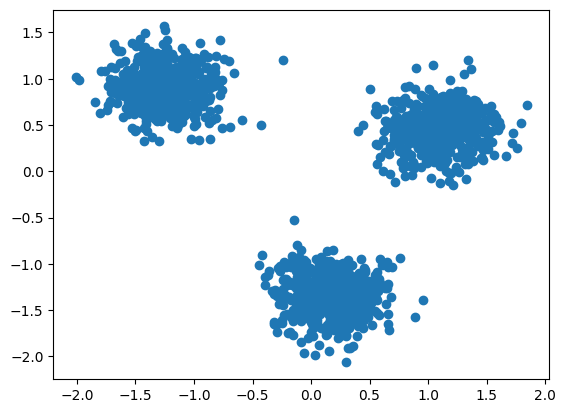

In [5]:
X, y = create_data_points([[4,3], [2,-1], [-1,4]] , 1500, 0.5)
plt.scatter(X[:,0], X[:,1], marker='o')

In [6]:
epsilon = 0.3
min_samples = 7
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = db.labels_
labels

array([0, 1, 1, ..., 2, 1, 1], dtype=int64)

Get rid of outliers, purpose of DBSCAN

In [7]:
msk = np.zeros_like(labels, dtype=bool)
msk[db.core_sample_indices_] = True
msk

array([ True,  True,  True, ...,  True,  True,  True])

In [8]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [9]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

In [ ]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_member_mask = (labels == k)
    xy = X[class_member_mask & msk]
    plt.scatter(xy[:, 0], xy[:, 1], s=50,)